In [1]:
import pandas as panda
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import *
import string
import nltk

from sklearn.preprocessing import OneHotEncoder
import numpy as np
from nltk.tokenize.treebank import TreebankWordDetokenizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop,Adam
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras import regularizers
from keras import backend as K
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt

In [2]:
data = panda.read_csv("labeled_data.csv")
data

,index,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, an..."
24780,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   index               24783 non-null  int64 
 1   count               24783 non-null  int64 
 2   hate_speech         24783 non-null  int64 
 3   offensive_language  24783 non-null  int64 
 4   neither             24783 non-null  int64 
 5   class               24783 non-null  int64 
 6   tweet               24783 non-null  object
dtypes: int64(6), object(1)
memory usage: 1.3+ MB


<AxesSubplot:>

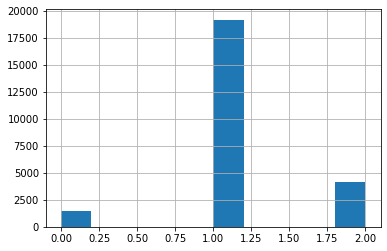

In [4]:
data['class'].hist()

In [5]:
tweet=data.tweet

In [6]:
def remove_space(tweet):  
    
    # removal of extra spaces
    regex_pat = re.compile(r'\s+')
    tweet_space = tweet.str.replace(regex_pat, ' ')
    # remove whitespace with a single space
    newtweet=tweet.str.replace(r'\s+', ' ')
    # remove leading and trailing whitespace
    newtweet=newtweet.str.replace(r'^\s+|\s+?$','')
    # replace normal numbers with numbr
    newtweet=newtweet.str.replace(r'\d+(\.\d+)?','numbr')
    # removal of capitalization
    tweet_lower = newtweet.str.lower()
    
    return tweet_lower

In [7]:
tweets_space= remove_space(tweet)
data["tweets_w/o_space"]=tweets_space
data.head()

,index,count,hate_speech,offensive_language,neither,class,tweet,tweets_w/o_space
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,!!! rt @mayasolovely: as a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,!!!!! rt @mleewnumbr: boy dats cold...tyga dwn...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,!!!!!!! rt @urkindofbrand dawg!!!! rt @numbrsb...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,!!!!!!!!! rt @c_g_anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,!!!!!!!!!!!!! rt @shenikaroberts: the shit you...


In [8]:
def remove_urls(tweet):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', tweet)

data["tweet_w/o_url"] = data["tweets_w/o_space"].apply(lambda tweet: remove_urls(tweet))

In [9]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Sridhar\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [10]:
from nltk.stem import WordNetLemmatizer

data['tweet_lem'] = [''.join([WordNetLemmatizer().lemmatize(re.sub('[^A-Za-z]',' ',tweet)) for tweet in lis]) for lis in data['tweet_w/o_url']]

In [11]:
data["tokenized_tweet"] = data["tweet_lem"].apply(lambda x: x.split())

In [12]:
data.head()

,index,count,hate_speech,offensive_language,neither,class,tweet,tweets_w/o_space,tweet_w/o_url,tweet_lem,tokenized_tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,!!! rt @mayasolovely: as a woman you shouldn't...,!!! rt @mayasolovely: as a woman you shouldn't...,rt mayasolovely as a woman you shouldn t...,"[rt, mayasolovely, as, a, woman, you, shouldn,..."
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,!!!!! rt @mleewnumbr: boy dats cold...tyga dwn...,!!!!! rt @mleewnumbr: boy dats cold...tyga dwn...,rt mleewnumbr boy dats cold tyga dwn...,"[rt, mleewnumbr, boy, dats, cold, tyga, dwn, b..."
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,!!!!!!! rt @urkindofbrand dawg!!!! rt @numbrsb...,!!!!!!! rt @urkindofbrand dawg!!!! rt @numbrsb...,rt urkindofbrand dawg rt numbrsb...,"[rt, urkindofbrand, dawg, rt, numbrsbabynumbrl..."
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,!!!!!!!!! rt @c_g_anderson: @viva_based she lo...,!!!!!!!!! rt @c_g_anderson: @viva_based she lo...,rt c g anderson viva based she lo...,"[rt, c, g, anderson, viva, based, she, look, l..."
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,!!!!!!!!!!!!! rt @shenikaroberts: the shit you...,!!!!!!!!!!!!! rt @shenikaroberts: the shit you...,rt shenikaroberts the shit you...,"[rt, shenikaroberts, the, shit, you, hear, abo..."


In [13]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Sridhar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [14]:
stopwords = nltk.corpus.stopwords.words("english")

#extending the stopwords to include other words used in twitter such as retweet(rt) etc.
other_exclusions = ["#ff", "ff", "rt"]
stopwords.extend(other_exclusions)
stemmer = PorterStemmer()

In [15]:
data["tweet_w/o_stop"] = data["tokenized_tweet"].apply(lambda x: [item for item in x if item not in stopwords])
data.head()

,index,count,hate_speech,offensive_language,neither,class,tweet,tweets_w/o_space,tweet_w/o_url,tweet_lem,tokenized_tweet,tweet_w/o_stop
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,!!! rt @mayasolovely: as a woman you shouldn't...,!!! rt @mayasolovely: as a woman you shouldn't...,rt mayasolovely as a woman you shouldn t...,"[rt, mayasolovely, as, a, woman, you, shouldn,...","[mayasolovely, woman, complain, cleaning, hous..."
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,!!!!! rt @mleewnumbr: boy dats cold...tyga dwn...,!!!!! rt @mleewnumbr: boy dats cold...tyga dwn...,rt mleewnumbr boy dats cold tyga dwn...,"[rt, mleewnumbr, boy, dats, cold, tyga, dwn, b...","[mleewnumbr, boy, dats, cold, tyga, dwn, bad, ..."
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,!!!!!!! rt @urkindofbrand dawg!!!! rt @numbrsb...,!!!!!!! rt @urkindofbrand dawg!!!! rt @numbrsb...,rt urkindofbrand dawg rt numbrsb...,"[rt, urkindofbrand, dawg, rt, numbrsbabynumbrl...","[urkindofbrand, dawg, numbrsbabynumbrlife, eve..."
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,!!!!!!!!! rt @c_g_anderson: @viva_based she lo...,!!!!!!!!! rt @c_g_anderson: @viva_based she lo...,rt c g anderson viva based she lo...,"[rt, c, g, anderson, viva, based, she, look, l...","[c, g, anderson, viva, based, look, like, tranny]"
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,!!!!!!!!!!!!! rt @shenikaroberts: the shit you...,!!!!!!!!!!!!! rt @shenikaroberts: the shit you...,rt shenikaroberts the shit you...,"[rt, shenikaroberts, the, shit, you, hear, abo...","[shenikaroberts, shit, hear, might, true, migh..."


In [16]:
processed_tweet = data["tweet_w/o_stop"].apply(lambda x: [stemmer.stem(i) for i in x]) 
    

In [17]:
 for i in range(len(processed_tweet)):
        processed_tweet[i] = ' '.join(processed_tweet[i])
        tweets_p= processed_tweet

In [18]:
data['processed_tweet'] = tweets_p

In [19]:
data.head()

,index,count,hate_speech,offensive_language,neither,class,tweet,tweets_w/o_space,tweet_w/o_url,tweet_lem,tokenized_tweet,tweet_w/o_stop,processed_tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,!!! rt @mayasolovely: as a woman you shouldn't...,!!! rt @mayasolovely: as a woman you shouldn't...,rt mayasolovely as a woman you shouldn t...,"[rt, mayasolovely, as, a, woman, you, shouldn,...","[mayasolovely, woman, complain, cleaning, hous...",mayasolov woman complain clean hous amp man al...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,!!!!! rt @mleewnumbr: boy dats cold...tyga dwn...,!!!!! rt @mleewnumbr: boy dats cold...tyga dwn...,rt mleewnumbr boy dats cold tyga dwn...,"[rt, mleewnumbr, boy, dats, cold, tyga, dwn, b...","[mleewnumbr, boy, dats, cold, tyga, dwn, bad, ...",mleewnumbr boy dat cold tyga dwn bad cuffin da...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,!!!!!!! rt @urkindofbrand dawg!!!! rt @numbrsb...,!!!!!!! rt @urkindofbrand dawg!!!! rt @numbrsb...,rt urkindofbrand dawg rt numbrsb...,"[rt, urkindofbrand, dawg, rt, numbrsbabynumbrl...","[urkindofbrand, dawg, numbrsbabynumbrlife, eve...",urkindofbrand dawg numbrsbabynumbrlif ever fuc...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,!!!!!!!!! rt @c_g_anderson: @viva_based she lo...,!!!!!!!!! rt @c_g_anderson: @viva_based she lo...,rt c g anderson viva based she lo...,"[rt, c, g, anderson, viva, based, she, look, l...","[c, g, anderson, viva, based, look, like, tranny]",c g anderson viva base look like tranni
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,!!!!!!!!!!!!! rt @shenikaroberts: the shit you...,!!!!!!!!!!!!! rt @shenikaroberts: the shit you...,rt shenikaroberts the shit you...,"[rt, shenikaroberts, the, shit, you, hear, abo...","[shenikaroberts, shit, hear, might, true, migh...",shenikarobert shit hear might true might faker...


In [20]:
data.tweet

0        !!! RT @mayasolovely: As a woman you shouldn't...
1        !!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2        !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3        !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4        !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
                               ...                        
24778    you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779    you've gone and broke the wrong heart baby, an...
24780    young buck wanna eat!!.. dat nigguh like I ain...
24781                youu got wild bitches tellin you lies
24782    ~~Ruffled | Ntac Eileen Dahlia - Beautiful col...
Name: tweet, Length: 24783, dtype: object

In [21]:
data.processed_tweet

0        mayasolov woman complain clean hous amp man al...
1        mleewnumbr boy dat cold tyga dwn bad cuffin da...
2        urkindofbrand dawg numbrsbabynumbrlif ever fuc...
3                  c g anderson viva base look like tranni
4        shenikarobert shit hear might true might faker...
                               ...                        
24778    muthaf lie numbr lifeask numbr pearl corey ema...
24779      gone broke wrong heart babi drove redneck crazi
24780    young buck wanna eat dat nigguh like aint fuck...
24781                       youu got wild bitch tellin lie
24782    ruffl ntac eileen dahlia beauti color combin p...
Name: processed_tweet, Length: 24783, dtype: object

In [22]:
tweetstop = data['tweet_w/o_stop'] 

In [23]:
labels = data['class']

In [24]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False)

labels = encoder.fit_transform(np.array(labels).reshape(-1, 1))

In [25]:
from nltk.tokenize.treebank import TreebankWordDetokenizer
def detokenize(text):
    return TreebankWordDetokenizer().detokenize(text)

In [26]:
data1 = []

for i in range(len(tweetstop)):
    data1.append(detokenize(tweetstop[i]))
print(data1[:5])

['mayasolovely woman complain cleaning house amp man always take trash', 'mleewnumbr boy dats cold tyga dwn bad cuffin dat hoe numbrst place', 'urkindofbrand dawg numbrsbabynumbrlife ever fuck bitch start cry confused shit', 'c g anderson viva based look like tranny', 'shenikaroberts shit hear might true might faker bitch told ya numbr']


In [27]:
data1 = np.array(data1)

In [28]:
max_words = 5000
max_len = 200

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(data1)
sequences = tokenizer.texts_to_sequences(data1)
tweets_in = pad_sequences(sequences, maxlen=max_len)
print(tweets_in)

[[   0    0    0 ...   83   76   15]
 [   0    0    0 ...    7  605  414]
 [   0    0    0 ...  470  900   12]
 ...
 [   0    0    0 ...   96   95  246]
 [   0    0    0 ...    3 1826 1247]
 [   0    0    0 ...   94   17   48]]


In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(tweets_in,labels, random_state=0)
print (len(X_train),len(X_test),len(y_train),len(y_test))

18587 6196 18587 6196


In [30]:
model1 = Sequential()
model1.add(layers.Embedding(max_words, 20))
model1.add(layers.LSTM(15,dropout=0.5))
model1.add(layers.Dense(3,activation='softmax'))


model1.compile(optimizer='rmsprop',loss='categorical_crossentropy', metrics=['accuracy'])

In [31]:
checkpoint1 = ModelCheckpoint("best_model1.hdf5", monitor='val_accuracy', verbose=1,save_best_only=True, mode='auto', period=1,save_weights_only=False)

In [32]:
history1 = model1.fit(X_train, y_train, epochs=10,validation_data=(X_test, y_test),callbacks=[checkpoint1])

Epoch 1/10
581/581 [==============================] - ETA: 0s - loss: 0.4937 - accuracy: 0.8260
Epoch 00001: val_accuracy improved from -inf to 0.88073, saving model to best_model1.hdf5
581/581 [==============================] - 33s 57ms/step - loss: 0.4937 - accuracy: 0.8260 - val_loss: 0.3475 - val_accuracy: 0.8807
Epoch 2/10
581/581 [==============================] - ETA: 0s - loss: 0.3371 - accuracy: 0.8872
Epoch 00002: val_accuracy improved from 0.88073 to 0.89106, saving model to best_model1.hdf5
581/581 [==============================] - 36s 61ms/step - loss: 0.3371 - accuracy: 0.8872 - val_loss: 0.3234 - val_accuracy: 0.8911
Epoch 3/10
581/581 [==============================] - ETA: 0s - loss: 0.3175 - accuracy: 0.8945
Epoch 00003: val_accuracy improved from 0.89106 to 0.89251, saving model to best_model1.hdf5
581/581 [==============================] - 36s 61ms/step - loss: 0.3175 - accuracy: 0.8945 - val_loss: 0.3189 - val_accuracy: 0.8925
Epoch 4/10
581/581 [=================

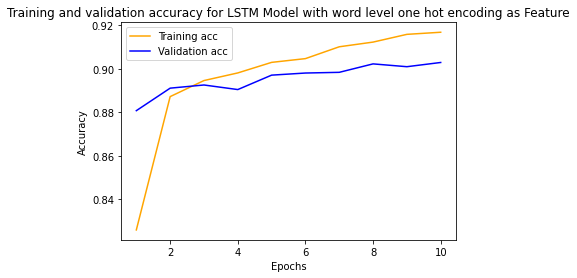

<Figure size 432x288 with 0 Axes>

In [37]:
import matplotlib.pyplot as plt
acc = history1.history['accuracy']
val_acc = history1.history['val_accuracy']

epochs = range(1, 11)

plt.plot(epochs, acc, 'orange', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy for LSTM Model with word level one hot encoding as Feature')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.figure()
plt.show()

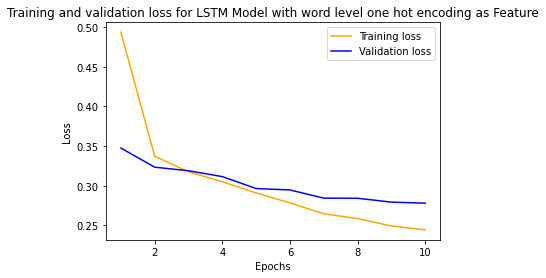

In [35]:
loss = history1.history['loss']
val_loss = history1.history['val_loss']

epochs = range(1, 11)

plt.plot(epochs, loss, 'orange', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss for LSTM Model with word level one hot encoding as Feature')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [38]:
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2),max_df=0.75, min_df=5, max_features=1000)
tfidf = tfidf_vectorizer.fit_transform(data['processed_tweet'] ).toarray()
tfidf

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [39]:
tfidf.shape

(24783, 1000)

In [40]:
max_words = 10000

In [41]:
model2 = Sequential()
model2.add(layers.Embedding(max_words, 20))
model2.add(layers.LSTM(15,dropout=0.5))
model2.add(layers.Dense(3,activation='softmax'))


model2.compile(optimizer='rmsprop',loss='categorical_crossentropy', metrics=['accuracy'])

In [42]:
from sklearn.model_selection import train_test_split
X = tfidf
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, labels, random_state=42, test_size=0.2)

In [43]:
checkpoint2 = ModelCheckpoint("best_model2.hdf5", monitor='val_accuracy', verbose=1,save_best_only=True, mode='auto', period=1,save_weights_only=False)

In [44]:
history2 = model2.fit(X_train1, y_train1, epochs=10,  validation_data=(X_test, y_test),callbacks=[checkpoint2])

Epoch 1/10
620/620 [==============================] - ETA: 0s - loss: 0.6751 - accuracy: 0.7727
Epoch 00001: val_accuracy improved from -inf to 0.77469, saving model to best_model2.hdf5
620/620 [==============================] - 197s 318ms/step - loss: 0.6751 - accuracy: 0.7727 - val_loss: 0.6653 - val_accuracy: 0.7747
Epoch 2/10
620/620 [==============================] - ETA: 0s - loss: 0.6627 - accuracy: 0.7746
Epoch 00002: val_accuracy did not improve from 0.77469
620/620 [==============================] - 197s 318ms/step - loss: 0.6627 - accuracy: 0.7746 - val_loss: 0.6686 - val_accuracy: 0.7747
Epoch 3/10
620/620 [==============================] - ETA: 0s - loss: 0.6630 - accuracy: 0.7746
Epoch 00003: val_accuracy did not improve from 0.77469
620/620 [==============================] - 196s 317ms/step - loss: 0.6630 - accuracy: 0.7746 - val_loss: 0.6654 - val_accuracy: 0.7747
Epoch 4/10
620/620 [==============================] - ETA: 0s - loss: 0.6626 - accuracy: 0.7746
Epoch 00004

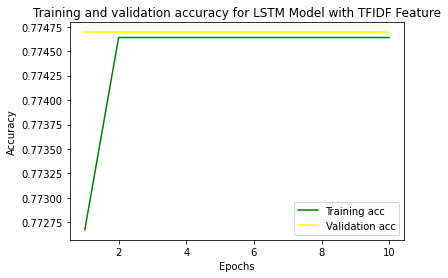

<Figure size 432x288 with 0 Axes>

In [45]:
import matplotlib.pyplot as plt
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']

epochs = range(1, 11)

plt.plot(epochs, acc, 'green', label='Training acc')
plt.plot(epochs, val_acc, 'yellow', label='Validation acc')
plt.title('Training and validation accuracy for LSTM Model with TFIDF Feature')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.figure()
plt.show()

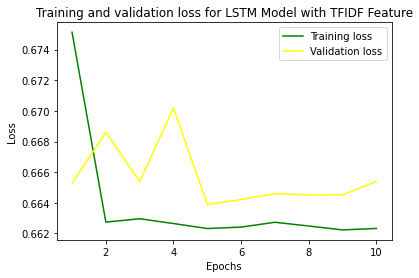

In [46]:
loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs = range(1, 11)

plt.plot(epochs, loss, 'green', label='Training loss')
plt.plot(epochs, val_loss, 'yellow', label='Validation loss')
plt.title('Training and validation loss for LSTM Model with TFIDF Feature')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [47]:
bow_vectorizer = CountVectorizer( max_features=100, stop_words='english', ngram_range=(2,2))
bagofwords=bow_vectorizer.fit_transform(data['processed_tweet'] ).toarray()
bagofwords

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [48]:
bagofwords.shape

(24783, 100)

In [49]:
X = bagofwords
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, labels, random_state=42, test_size=0.2)

In [50]:
model3 = Sequential()
model3.add(layers.Embedding(max_words, 20))
model3.add(layers.LSTM(15,dropout=0.5))
model3.add(layers.Dense(3,activation='softmax'))


model3.compile(optimizer='rmsprop',loss='categorical_crossentropy', metrics=['accuracy'])

In [51]:
checkpoint3 = ModelCheckpoint("best_model3.hdf5", monitor='val_accuracy', verbose=1,save_best_only=True, mode='auto', period=1,save_weights_only=False)

In [52]:
history3 = model3.fit(X_train2, y_train2, epochs=10, steps_per_epoch=20, validation_data=(X_test, y_test),callbacks=[checkpoint3])

Epoch 1/10
20/20 [==============================] - ETA: 0s - loss: 0.8173 - accuracy: 0.7500
Epoch 00001: val_accuracy improved from -inf to 0.77469, saving model to best_model3.hdf5
20/20 [==============================] - 7s 327ms/step - loss: 0.8173 - accuracy: 0.7500 - val_loss: 0.6705 - val_accuracy: 0.7747
Epoch 2/10
20/20 [==============================] - ETA: 0s - loss: 0.6652 - accuracy: 0.7746
Epoch 00002: val_accuracy did not improve from 0.77469
20/20 [==============================] - 6s 278ms/step - loss: 0.6652 - accuracy: 0.7746 - val_loss: 0.6623 - val_accuracy: 0.7747
Epoch 3/10
20/20 [==============================] - ETA: 0s - loss: 0.6621 - accuracy: 0.7746
Epoch 00003: val_accuracy did not improve from 0.77469
20/20 [==============================] - 6s 305ms/step - loss: 0.6621 - accuracy: 0.7746 - val_loss: 0.6625 - val_accuracy: 0.7747
Epoch 4/10
20/20 [==============================] - ETA: 0s - loss: 0.6618 - accuracy: 0.7746
Epoch 00004: val_accuracy did n

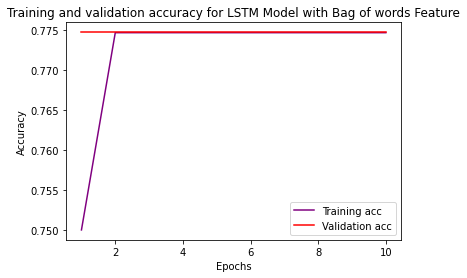

<Figure size 432x288 with 0 Axes>

In [53]:
import matplotlib.pyplot as plt
acc = history3.history['accuracy']
val_acc = history3.history['val_accuracy']

epochs = range(1, 11)

plt.plot(epochs, acc, 'purple', label='Training acc')
plt.plot(epochs, val_acc, 'red', label='Validation acc')
plt.title('Training and validation accuracy for LSTM Model with Bag of words Feature')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.figure()
plt.show()

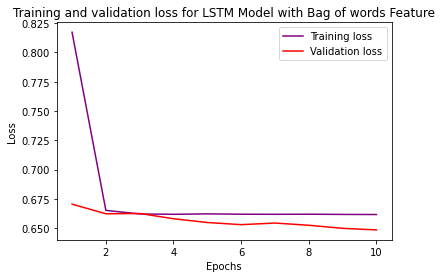

In [54]:
loss = history3.history['loss']
val_loss = history3.history['val_loss']

epochs = range(1, 11)

plt.plot(epochs, loss, 'purple', label='Training loss')
plt.plot(epochs, val_loss, 'red', label='Validation loss')
plt.title('Training and validation loss for LSTM Model with Bag of words Feature')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()